In [2]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, LSTM, Bidirectional, Dropout, Input, TimeDistributed, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from tqdm import trange

# from matplotlib import rc
# rc('font', family='NanumGothic')

In [3]:
# Load and check the dataset
df_features = pd.read_csv('../data/features_train.csv')
df_labels = pd.read_csv('../data/labels_train.csv')

print('Feature data')
display(df_features.head(5))

print('Label')
display(df_labels.head(5))

Feature data


,stage1_temp,stage2_temp,stage3_temp,stage4_temp,stage5_temp,stage1_humidity,stage2_humidity,stage3_humidity,stage4_humidity,stage5_humidity,...,stage4_viscosity_deviation,stage4_co2_deviation,stage4_o2_deviation,stage4_n_deviation,stage5_flow_deviation,stage5_density_deviation,stage5_viscosity_deviation,stage5_co2_deviation,stage5_o2_deviation,stage5_n_deviation
0,28.57,30.15,30.71,30.91,31.62,69.08,68.98,70.37,73.67,69.41,...,3.897850,-0.381981,-0.917519,2.905965,NaN,14.642069,NaN,2.249968,NaN,NaN
1,31.74,31.29,30.92,29.52,30.70,68.24,75.97,72.06,69.72,76.11,...,-0.336600,NaN,-4.937284,0.089265,-4.937284,12.361204,NaN,3.381750,5.827666,-0.056206
2,31.25,29.16,31.45,30.74,30.26,67.98,78.42,70.97,67.71,70.73,...,5.108084,5.685728,NaN,0.871249,-0.955908,1.587669,1.665659,-0.052572,-0.597566,-2.745544
3,29.96,29.22,28.39,31.96,31.12,68.60,67.80,70.09,71.88,76.71,...,-2.535448,5.497906,-2.134062,-1.188985,-2.134062,NaN,NaN,3.230979,-0.032255,0.157905
4,30.09,29.58,28.06,30.46,28.84,78.24,67.31,72.63,77.78,74.76,...,-10.559326,7.259878,-0.192612,-1.648626,-0.192612,9.741397,NaN,-0.516248,2.129390,0.020616


Label


,label
0,1
1,1
2,0
3,0
4,0


In [72]:
# Check the columns
features = df_features.columns.tolist()
print(f'Feautures: {features}\n')

stage_columns = [[col for col in features if f'stage{i+1}' in col] for i in range(5)]
for i, cols in enumerate(stage_columns):
    print(f'Stage {i+1}: {cols}')

Feautures: ['stage1_temp', 'stage2_temp', 'stage3_temp', 'stage4_temp', 'stage5_temp', 'stage1_humidity', 'stage2_humidity', 'stage3_humidity', 'stage4_humidity', 'stage5_humidity', 'stage1_flow_deviation', 'stage1_density_deviation', 'stage1_viscosity_deviation', 'stage1_co2_deviation', 'stage1_o2_deviation', 'stage1_n_deviation', 'stage2_flow_deviation', 'stage2_density_deviation', 'stage2_viscosity_deviation', 'stage2_co2_deviation', 'stage2_o2_deviation', 'stage2_n_deviation', 'stage3_flow_deviation', 'stage3_density_deviation', 'stage3_viscosity_deviation', 'stage3_co2_deviation', 'stage3_o2_deviation', 'stage3_n_deviation', 'stage4_flow_deviation', 'stage4_density_deviation', 'stage4_viscosity_deviation', 'stage4_co2_deviation', 'stage4_o2_deviation', 'stage4_n_deviation', 'stage5_flow_deviation', 'stage5_density_deviation', 'stage5_viscosity_deviation', 'stage5_co2_deviation', 'stage5_o2_deviation', 'stage5_n_deviation']

Stage 1: ['stage1_temp', 'stage1_humidity', 'stage1_flow_

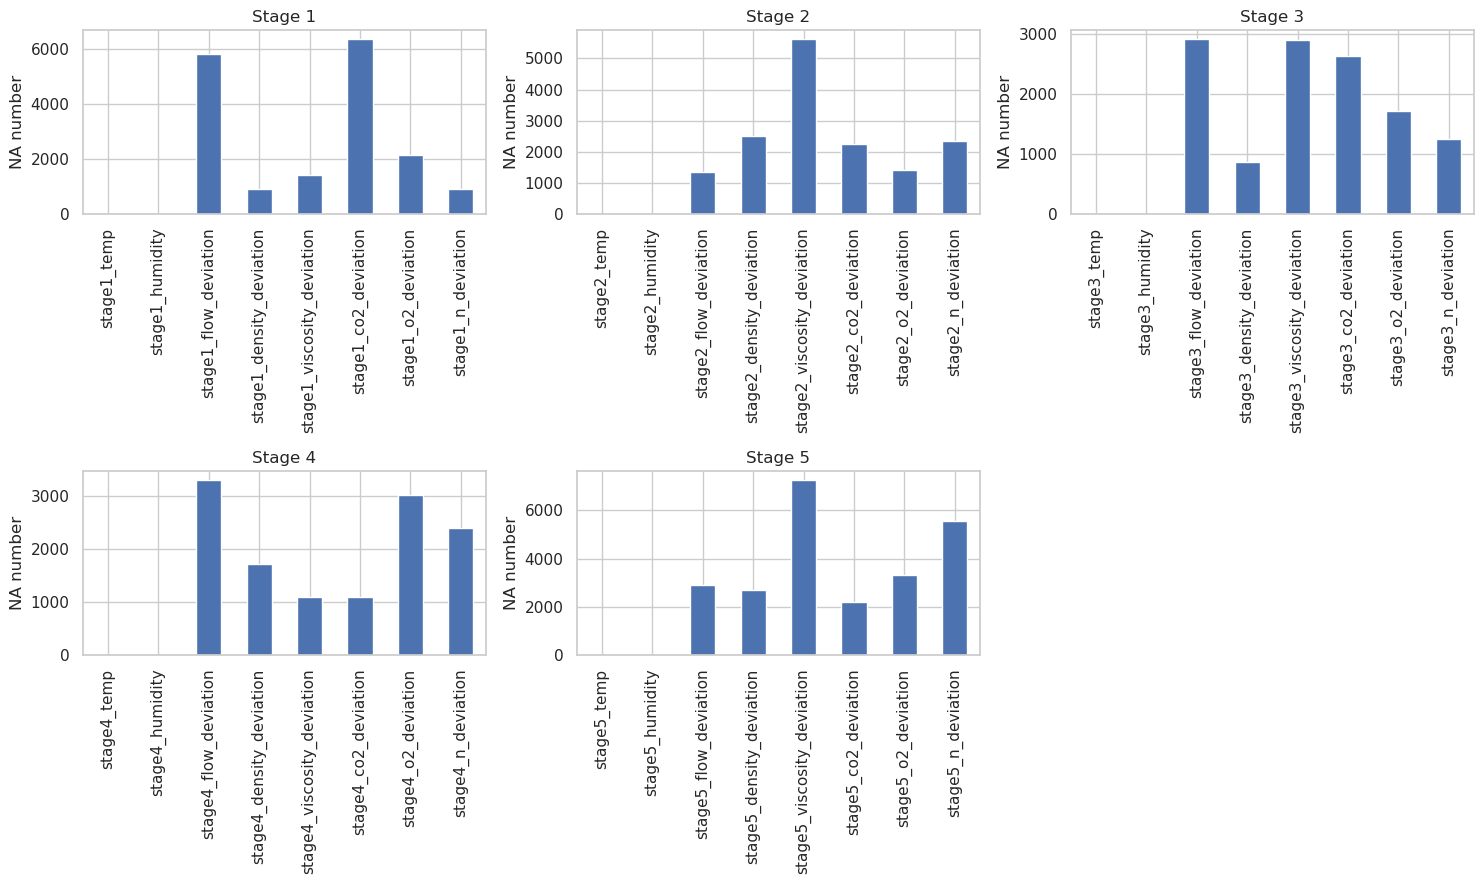

In [73]:
# Check NA values

fig, axes = plt.subplots(2, 3, figsize=(15, 9))
axes = axes.flatten()
for i, ax in enumerate(axes[:5]):
    na_series = df_features[stage_columns[i]].isnull().sum()
    na_series.plot(kind='bar', ax=ax)
    ax.set_title(f'Stage {i+1}')
    ax.set_ylabel('NA number')
for ax in axes[5:]:
    ax.axis("off")

plt.tight_layout()
plt.show()

/tmp/ipykernel_1299012/2286424730.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(
/tmp/ipykernel_1299012/2286424730.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(
/tmp/ipykernel_1299012/2286424730.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(
/tmp/ipykernel_1299012/2286424730.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(
/tmp/ipykernel_1299012/2286424730.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(
/tmp/ipykernel_12990

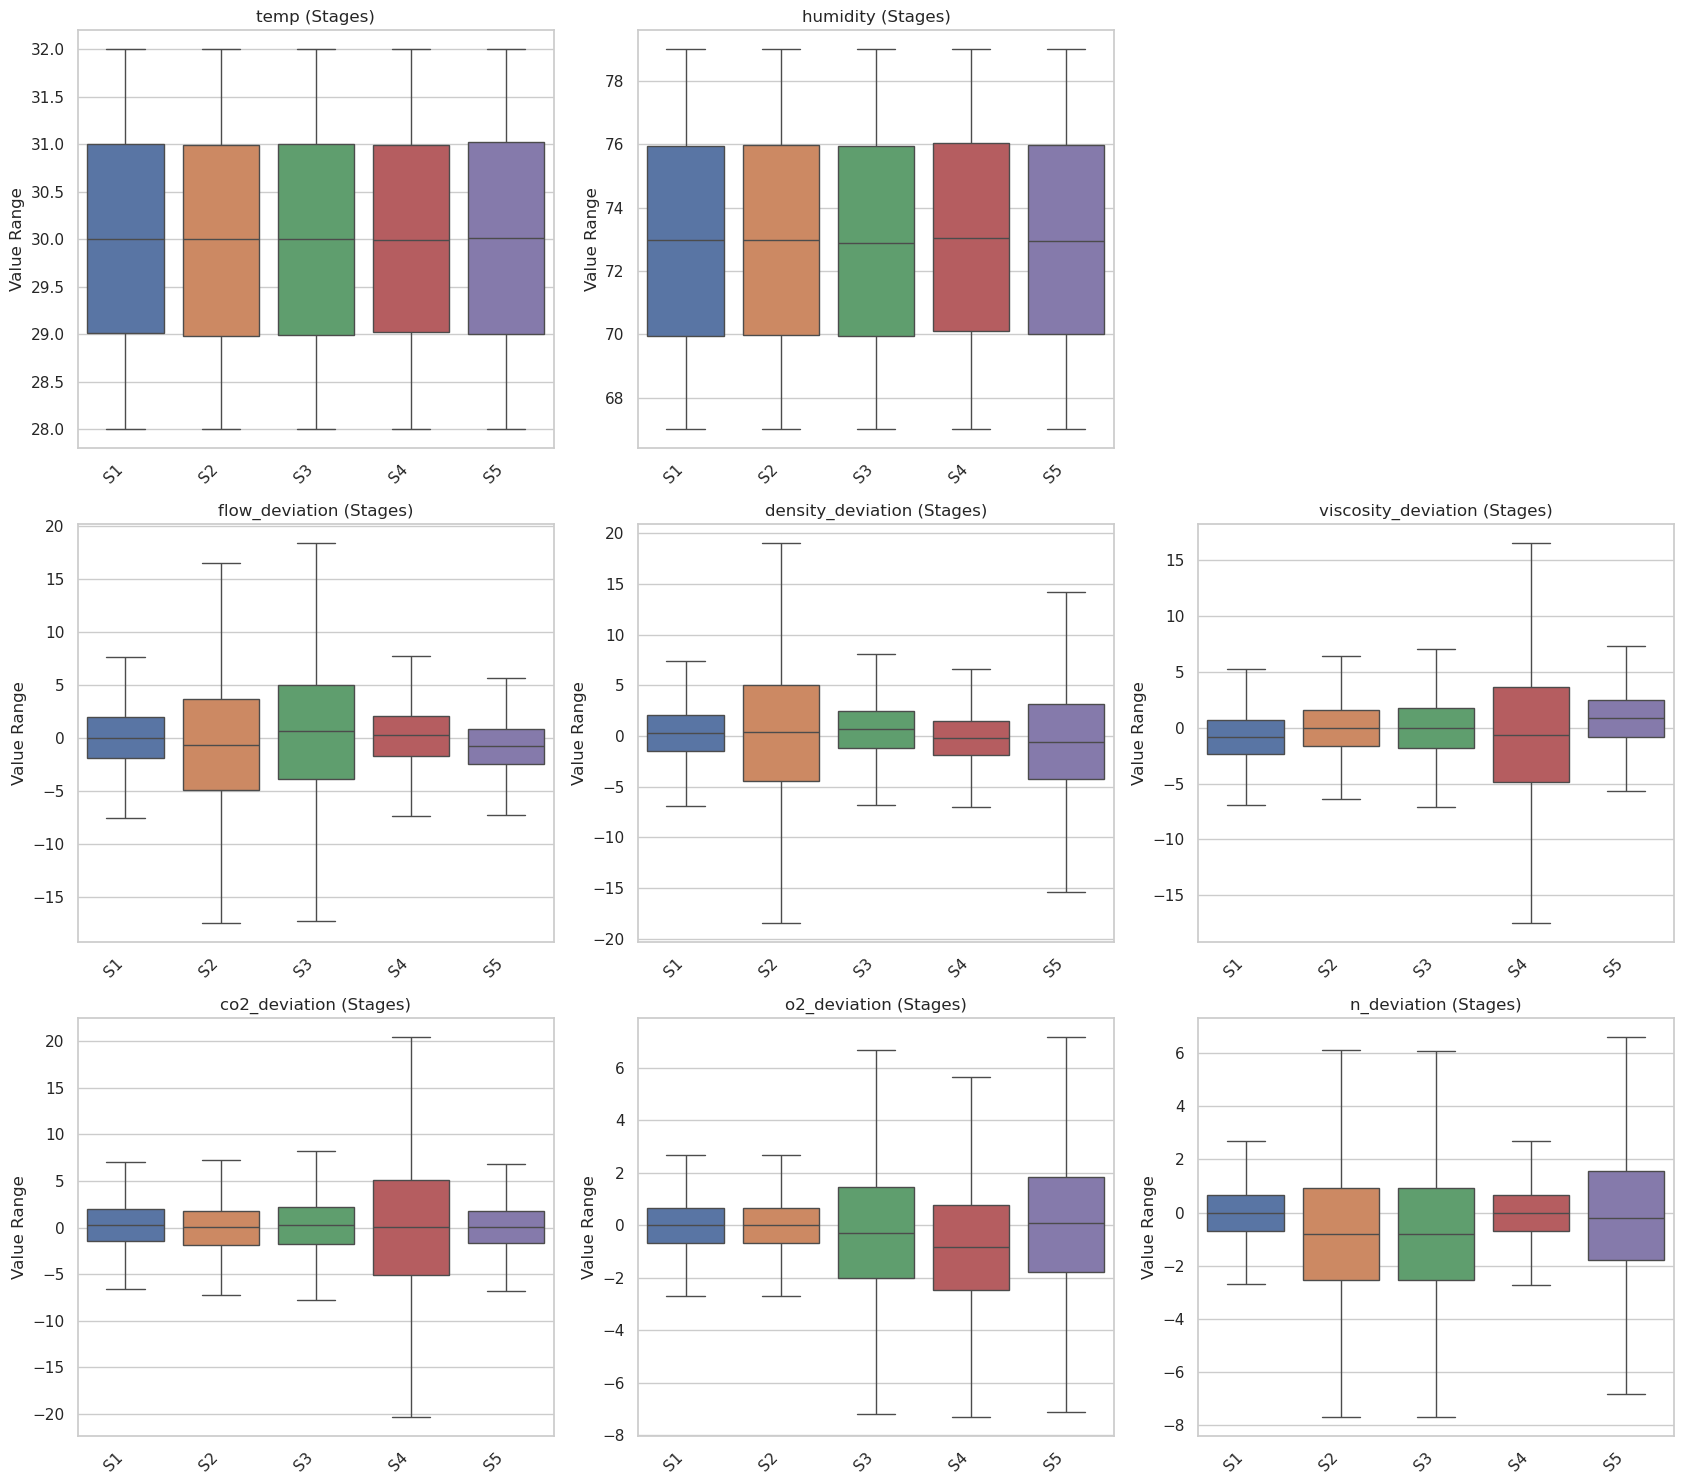

In [76]:
import re
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt

# feature base name 추출 함수
def get_base_feature(col):
    m = re.match(r"stage\d+_(.+)", col)
    return m.group(1) if m else col

# base feature별로 컬럼 묶기
feature_groups = defaultdict(list)
for col in df_features.columns:
    base = get_base_feature(col)
    feature_groups[base].append(col)

# 정렬
feature_groups = {k: sorted(v) for k, v in feature_groups.items()}

# feature 목록
feat_list = list(feature_groups.keys())
n_feat = len(feat_list)

# subplot size 계산 (예: 2x3, 3x3 등 자동)
n_cols = 3
n_rows = (n_feat + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(17, 5*n_rows))
axes = axes.flatten()

for i, feat in enumerate(feat_list):
    cols = feature_groups[feat]
    data = df_features[cols]
    if i >1:
        i += 1
    sns.boxplot(
        data=data,
        ax=axes[i],
        showfliers=False   # outlier 제거 (fliers off)
    )

    axes[i].set_title(f"{feat} (Stages)")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Value Range")
    axes[i].set_xticklabels(
        ["S"+col.split('_')[0].replace("stage", "") for col in cols],
        rotation=45,
        ha="right"
    )

# 남는 subplot 비우기
axes[2].axis("off")
# for j in range(i+1, len(axes)):
#     axes[j].axis("off")

plt.tight_layout()
plt.show()


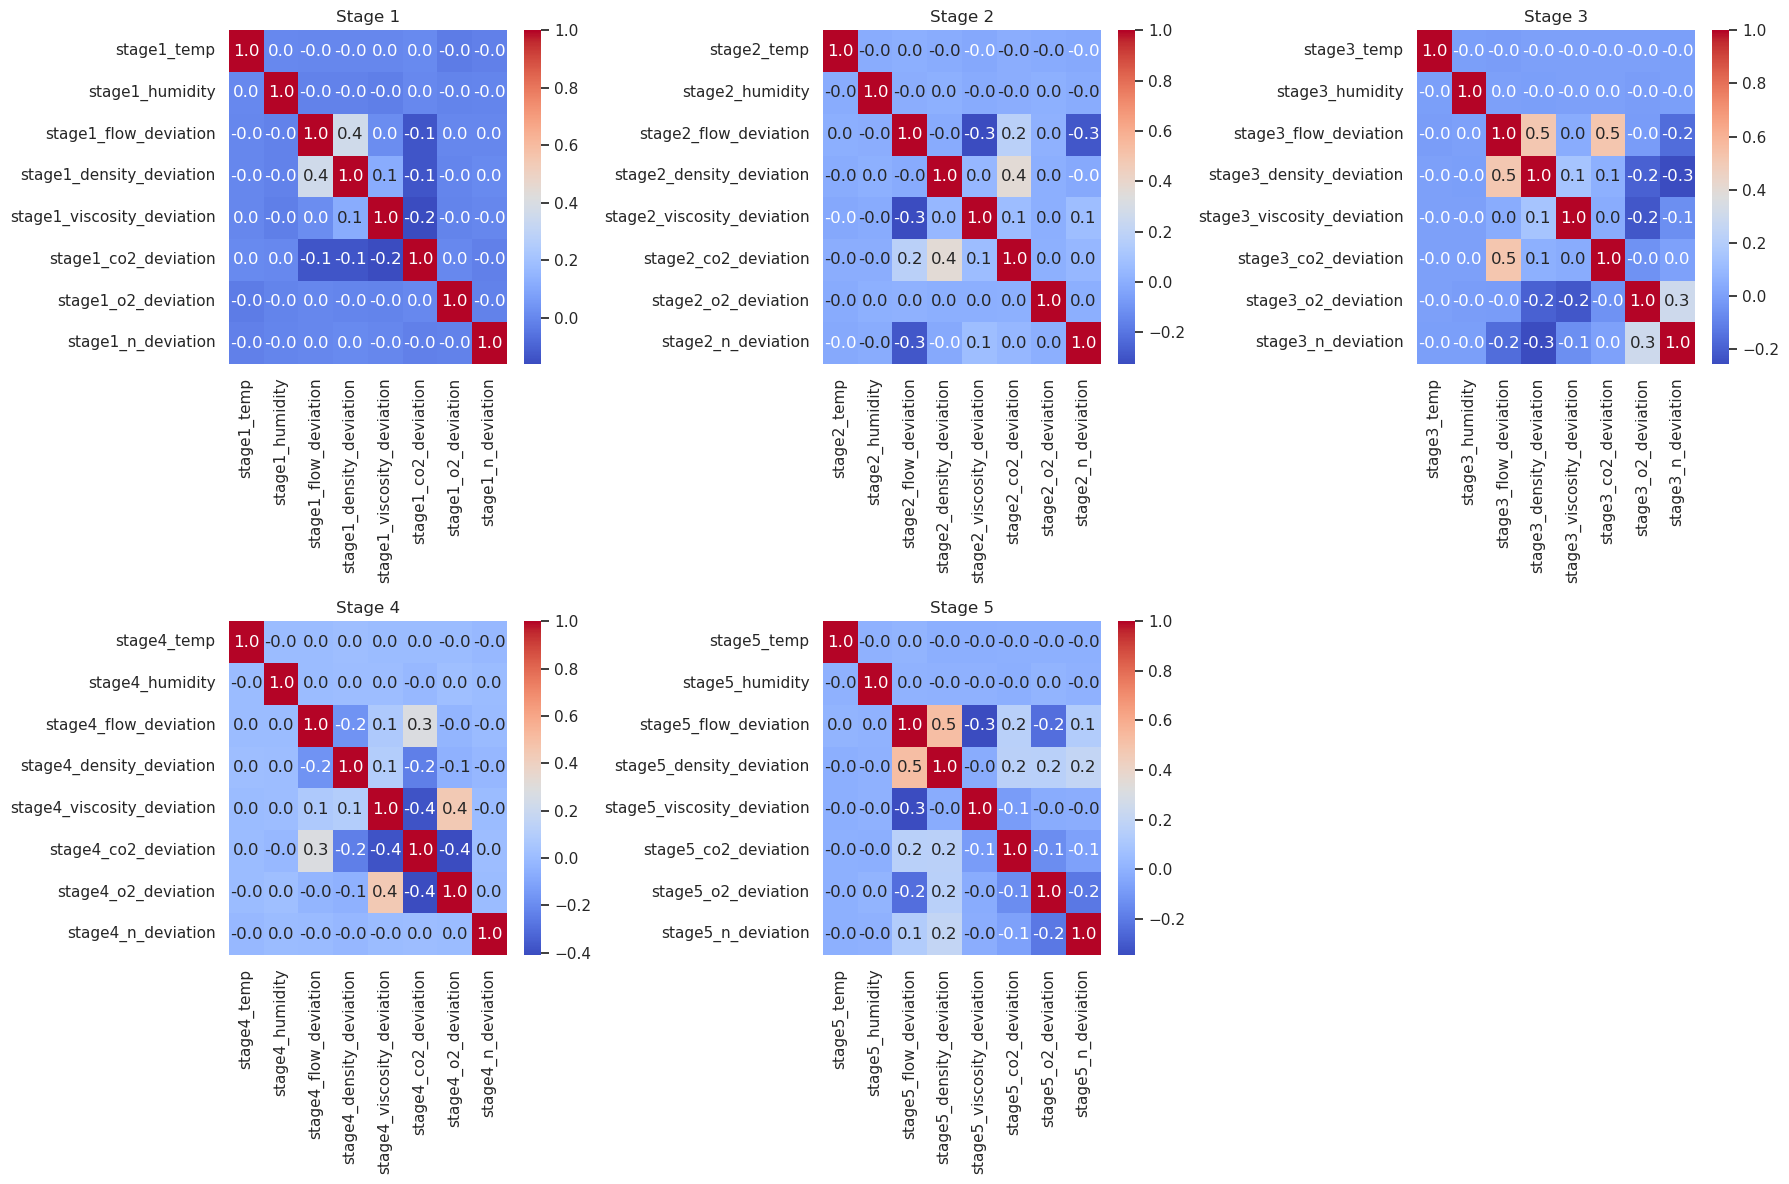

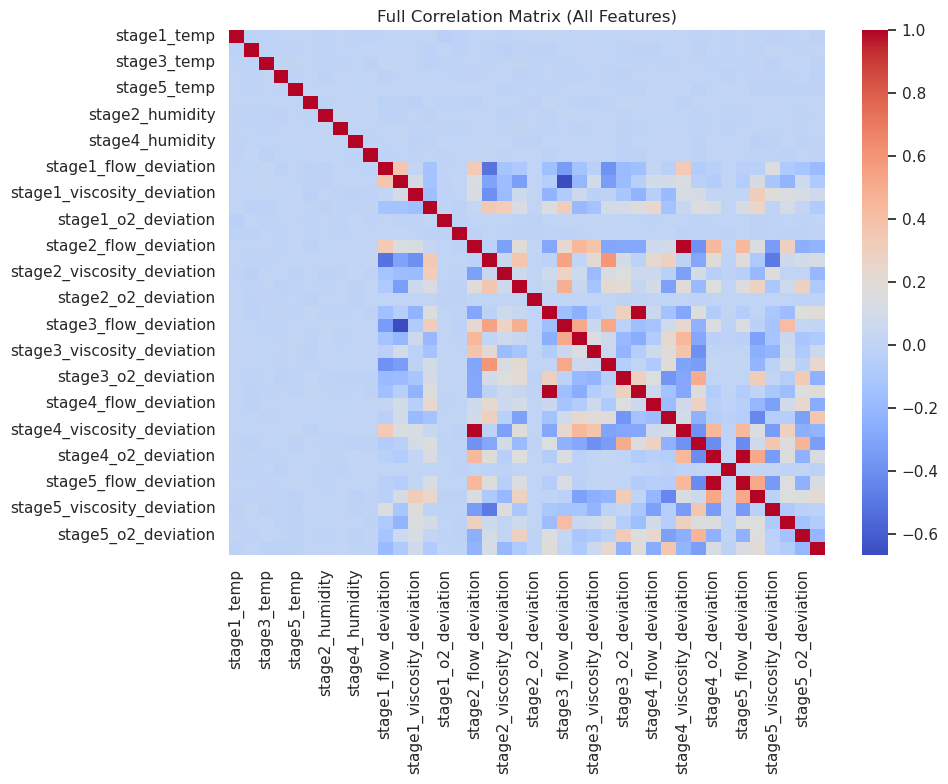

In [77]:
# Check the correlation

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()
for i in range(5):
    corr = df_features[stage_columns[i]].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.1f', ax=axes[i])
    axes[i].set_title(f'Stage {i+1}')
for ax in axes[5:]:
    ax.axis("off")
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 8))
full_corr = df_features[features].corr().reindex(index=features, columns=features)
sns.heatmap(full_corr, annot=False, cmap='coolwarm')
plt.title("Full Correlation Matrix (All Features)", fontsize=12)
plt.tight_layout()
plt.show()

In [7]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df_features, df_labels, 
                                                            test_size=0.2, stratify=df_labels,
                                                            random_state=42)
print(f"Train/Test split complete (Train: {X_train_raw.shape}, Test: {X_test_raw.shape})")

Train/Test split complete (Train: (13598, 40), Test: (3400, 40))


In [8]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(
    n_neighbors=5,   # 주변 5개 샘플로 평균
    weights="distance",  # 가까울수록 더 큰 가중치
    metric="nan_euclidean"  # NaN 고려해서 거리 계산
)

X_train_imputed = imputer.fit_transform(X_train_raw)
X_test_imputed  = imputer.transform(X_test_raw)

In [ ]:
# from sklearn.experimental import enable_iterative_imputer  # 반드시 먼저 import
# from sklearn.impute import IterativeImputer
# from xgboost import XGBRegressor

# # X: pandas DataFrame 또는 numpy array (결측치 포함)
# imputer = IterativeImputer(
#     estimator=XGBRegressor(
#         n_estimators=200,
#         max_depth=4,
#         learning_rate=0.05,
#         subsample=0.8,
#         colsample_bytree=0.8,
#         tree_method="hist",
#         n_jobs=-1,
#         random_state=42,
#     ),
#     max_iter=10,
#     random_state=42,
#     initial_strategy="median"
# )

# # ⚠️ 데이터리크 방지: train에만 fit, test에는 transform만
# X_train_imputed = imputer.fit_transform(X_train_raw)
# X_test_imputed  = imputer.transform(X_test_raw)

In [9]:
scaler = StandardScaler()
X_train_scaled_np = scaler.fit_transform(X_train_imputed)
X_test_scaled_np = scaler.transform(X_test_imputed)
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=features)
X_test_scaled = pd.DataFrame(X_test_scaled_np, columns=features)

In [10]:


# def get_mlp_model(input_shape):
#     model = Sequential([
#         Input(shape=(input_shape)),
#         Dense(32, activation='gelu'),
#         Dropout(0.2),
#         Dense(32, activation='gelu'),
#         Dropout(0.2),
#         Dense(32, activation='gelu'),
#         Dropout(0.2),
#         Dense(2, activation='softmax')
#     ])
#     model.compile(optimizer=tf.keras.optimizers.Adam(1e-2, clipnorm=1.0),
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])
#     return model

In [24]:
def get_mlp_model(input_shape):
    model = Sequential([
        Input(shape=(input_shape,)), 
        Dense(32, activation='gelu'),
        Dropout(0.2),
        Dense(32, activation='gelu'),
        Dropout(0.2),
        Dense(32, activation='gelu'),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-2, clipnorm=1.0),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

print("\n=== Cumulative Stage Performance Analysis (Keras/GPU) ===")

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)
early_stopper = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)


X_train_sub = X_train_scaled[features]
X_test_sub = X_test_scaled[features]
    
model = get_mlp_model(input_shape=X_train_sub.shape[1])
    
history = model.fit(X_train_sub, y_train,
                    epochs=1000, batch_size=64,
                    validation_split=0.1,
                    callbacks=[reduce_lr, early_stopper],
                    verbose=0)
    
y_prob = model.predict(X_test_sub, verbose=0)
y_pred = np.argmax(y_prob,axis=1)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print(f"[Acc: {acc:.4f} | F1: {f1:.4f} | Recall: {recall:.4f} (Keras Epochs: {len(history.history['loss'])})")

plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid")


=== Cumulative Stage Performance Analysis (Keras/GPU) ===


2025-11-27 15:42:05.798779: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1905', 8 bytes spill stores, 8 bytes spill loads



[Acc: 0.9544 | F1: 0.8818 | Recall: 0.8413 (Keras Epochs: 71)


<Figure size 1200x700 with 0 Axes>

In [ ]:
# def get_mlp_model(input_shape):
#     model = Sequential([
#         Input(shape=(input_shape,)), 
#         Dense(32, activation='gelu'),
#         Dropout(0.2),
#         Dense(32, activation='gelu'),
#         Dropout(0.2),
#         Dense(32, activation='gelu'),
#         Dropout(0.2),
#         Dense(2, activation='softmax')
#     ])
#     model.compile(optimizer=tf.keras.optimizers.Adam(1e-2, clipnorm=1.0),
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])
#     return model

# print("\n=== Cumulative Stage Performance Analysis (Keras/GPU) ===")
# results = {
#     'Stage': [],
#     'Accuracy': [],
#     'F1-Score': [],
#     'Recall': []
# }

# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)
# early_stopper = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# current_features = []
# for i in trange(5):
#     current_features.extend(stage_columns[i])
#     stage_name = f'~S{i+1}'
#     print(current_features)
#     X_train_sub = X_train_scaled[current_features]
#     X_test_sub = X_test_scaled[current_features]
    
#     model = get_mlp_model(input_shape=X_train_sub.shape[1])
    
#     history = model.fit(X_train_sub, y_train,
#                         epochs=1000, batch_size=64,
#                         validation_split=0.1,
#                         callbacks=[reduce_lr, early_stopper],
#                         verbose=0)
    
#     y_prob = model.predict(X_test_sub, verbose=0)
#     y_pred = np.argmax(y_prob,axis=1)

#     acc = accuracy_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)

#     results['Stage'].append(stage_name)
#     results['Accuracy'].append(acc)
#     results['F1-Score'].append(f1)
#     results['Recall'].append(recall)

#     print(f"[{stage_name}] Acc: {acc:.4f} | F1: {f1:.4f} | Recall: {recall:.4f} (Keras Epochs: {len(history.history['loss'])})")

# plt.figure(figsize=(12, 7))
# sns.set_theme(style="whitegrid")

# # 레이블
# plt.plot(results['Stage'], results['Accuracy'], marker='o', linestyle='-', label='Accuracy', color='blue', alpha=0.7)
# plt.plot(results['Stage'], results['F1-Score'], marker='s', linestyle='--', label='F1-Score (Balanced)', color='orange', linewidth=2.5)
# plt.plot(results['Stage'], results['Recall'], marker='^', linestyle='-', label='Recall (Defect Detection)', color='crimson', linewidth=3)

# for i, recall_val in enumerate(results['Recall']):
#     plt.text(i, recall_val + 0.015, f'{recall_val:.3f}', ha='center', va='bottom', color='crimson', fontweight='bold')


=== Cumulative Stage Performance Analysis (Keras/GPU) ===


100%|██████████| 5/5 [00:00<00:00, 12228.29it/s]

['stage1_temp', 'stage1_humidity', 'stage1_flow_deviation', 'stage1_density_deviation', 'stage1_viscosity_deviation', 'stage1_co2_deviation', 'stage1_o2_deviation', 'stage1_n_deviation']
['stage1_temp', 'stage1_humidity', 'stage1_flow_deviation', 'stage1_density_deviation', 'stage1_viscosity_deviation', 'stage1_co2_deviation', 'stage1_o2_deviation', 'stage1_n_deviation', 'stage2_temp', 'stage2_humidity', 'stage2_flow_deviation', 'stage2_density_deviation', 'stage2_viscosity_deviation', 'stage2_co2_deviation', 'stage2_o2_deviation', 'stage2_n_deviation']
['stage1_temp', 'stage1_humidity', 'stage1_flow_deviation', 'stage1_density_deviation', 'stage1_viscosity_deviation', 'stage1_co2_deviation', 'stage1_o2_deviation', 'stage1_n_deviation', 'stage2_temp', 'stage2_humidity', 'stage2_flow_deviation', 'stage2_density_deviation', 'stage2_viscosity_deviation', 'stage2_co2_deviation', 'stage2_o2_deviation', 'stage2_n_deviation', 'stage3_temp', 'stage3_humidity', 'stage3_flow_deviation', 'stage3_

In [21]:
np.array([X_train_scaled[cols].to_numpy() for cols in stage_columns]).swapaxes(0,1).shape

(13598, 5, 8)

In [ ]:
def get_gru_model(num_stages, num_feats_per_stage):
    model = Sequential([
        Input(shape=(num_stages, num_feats_per_stage)),  # ← 여기서 입력 정의
        Bidirectional(LSTM(128, activation='gelu', return_sequences=True)),
        Dropout(0.2),
        # Bidirectional(LSTM(32, activation='gelu', return_sequences=True)),
        # Dropout(0.2),
        TimeDistributed(Dense(32, activation='gelu')),
        GlobalAveragePooling1D(),
        Dense(32, activation='gelu'),
        Dropout(0.2),
        Dense(2, activation='softmax'),
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-2, clipnorm=1.0),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

print("\n=== Cumulative Stage Performance Analysis (Keras/GPU, GRU) ===")
results = {
    'Stage': [],
    'Accuracy': [],
    'F1-Score': [],
    'Recall': []
}

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)
early_stopper = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

current_features = []
num_feats_per_stage = len(stage_columns[0])  # 모든 stage가 같은 feature 수라고 가정

for i in trange(5):
    current_features.extend(stage_columns[i])
    stage_name = f'~S{i+1}'
    
    # 2D → 3D (batch, stages, features_per_stage) 로 변환
    X_train_sub_2d = X_train_scaled[current_features].to_numpy()
    X_test_sub_2d  = X_test_scaled[current_features].to_numpy()
    
    num_stages = i + 1
    X_train_sub = X_train_sub_2d.reshape(-1, num_stages, num_feats_per_stage)
    X_test_sub  = X_test_sub_2d.reshape(-1, num_stages, num_feats_per_stage)

    X_train_sub = np.array([X_train_scaled[cols].to_numpy() for cols in stage_columns]).swapaxes(0,1)
    X_test_sub = np.array([X_test_scaled[cols].to_numpy() for cols in stage_columns]).swapaxes(0,1)



    # model = get_gru_model(num_stages=num_stages,
    #                       num_feats_per_stage=num_feats_per_stage)
    
    # history = model.fit(
    #     X_train_sub, y_train,
    #     epochs=1000, batch_size=64,
    #     validation_split=0.1,
    #     callbacks=[reduce_lr, early_stopper],
    #     verbose=0
    # )
    
    # y_prob = model.predict(X_test_sub, verbose=0)
    # y_pred = np.argmax(y_prob, axis=1)

    # acc = accuracy_score(y_test, y_pred)
    # f1 = f1_score(y_test, y_pred)
    # recall = recall_score(y_test, y_pred)

    # results['Stage'].append(stage_name)
    # results['Accuracy'].append(acc)
    # results['F1-Score'].append(f1)
    # results['Recall'].append(recall)

    # print(f"[{stage_name}] Acc: {acc:.4f} | F1: {f1:.4f} | Recall: {recall:.4f} "
    #       f"(Keras Epochs: {len(history.history['loss'])})")


=== Cumulative Stage Performance Analysis (Keras/GPU, GRU) ===


100%|██████████| 5/5 [00:00<00:00, 377.63it/s]

(13598, 1, 8)
(13598, 2, 8)
(13598, 3, 8)
(13598, 4, 8)
(13598, 5, 8)


In [23]:
def get_gru_model(num_stages, num_feats_per_stage):
    model = Sequential([
        Input(shape=(num_stages, num_feats_per_stage)),  # ← 여기서 입력 정의
        Bidirectional(LSTM(128, activation='gelu', return_sequences=True)),
        Dropout(0.2),
        Bidirectional(LSTM(128, activation='gelu', return_sequences=True)),
        Dropout(0.2),
        TimeDistributed(Dense(32, activation='gelu')),
        GlobalAveragePooling1D(),
        Dense(32, activation='gelu'),
        Dropout(0.2),
        Dense(2, activation='softmax'),
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-3, clipnorm=1.0),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

print("\n=== Cumulative Stage Performance Analysis (Keras/GPU, GRU) ===")
# results = {
#     'Stage': [],
#     'Accuracy': [],
#     'F1-Score': [],
#     'Recall': []
# }

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)
early_stopper = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)


X_train_sub = np.array([X_train_scaled[cols].to_numpy() for cols in stage_columns]).swapaxes(0,1)
X_test_sub = np.array([X_test_scaled[cols].to_numpy() for cols in stage_columns]).swapaxes(0,1)

model = get_gru_model(num_stages=num_stages,
                        num_feats_per_stage=num_feats_per_stage)

history = model.fit(
    X_train_sub, y_train,
    epochs=1000, batch_size=64,
    validation_split=0.1,
    callbacks=[reduce_lr, early_stopper],
    verbose=0
)

y_prob = model.predict(X_test_sub, verbose=0)
y_pred = np.argmax(y_prob, axis=1)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# results['Stage'].append(stage_name)
# results['Accuracy'].append(acc)
# results['F1-Score'].append(f1)
# results['Recall'].append(recall)

print(f"[{stage_name}] Acc: {acc:.4f} | F1: {f1:.4f} | Recall: {recall:.4f} "
        f"(Keras Epochs: {len(history.history['loss'])})")


=== Cumulative Stage Performance Analysis (Keras/GPU, GRU) ===


2025-11-27 15:39:26.953544: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-27 15:39:26.953609: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-27 15:41:11.505106: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.


[~S5] Acc: 0.9500 | F1: 0.8714 | Recall: 0.8384 (Keras Epochs: 45)


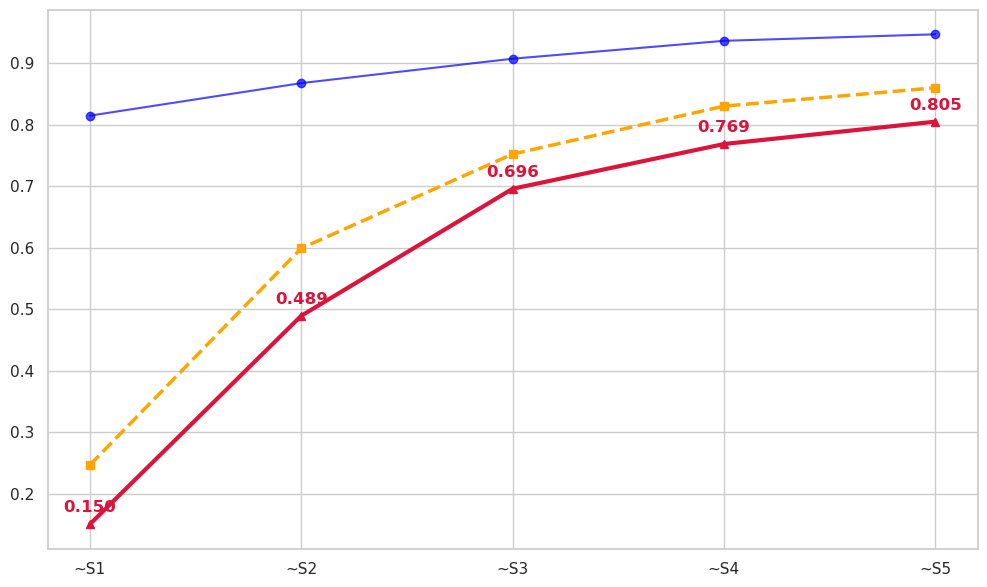

In [ ]:
plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid")

# 레이블
plt.plot(results['Stage'], results['Accuracy'], marker='o', linestyle='-', label='Accuracy', color='blue', alpha=0.7)
plt.plot(results['Stage'], results['F1-Score'], marker='s', linestyle='--', label='F1-Score (Balanced)', color='orange', linewidth=2.5)
plt.plot(results['Stage'], results['Recall'], marker='^', linestyle='-', label='Recall (Defect Detection)', color='crimson', linewidth=3)

for i, recall_val in enumerate(results['Recall']):
    plt.text(i, recall_val + 0.015, f'{recall_val:.3f}', ha='center', va='bottom', color='crimson', fontweight='bold')

In [ ]:
for i in range(1, 6):
    current_features.extend(stage_cols[i])
    stage_name = f'S1~S{i}'
    
    X_train_sub = X_train_scaled[current_features]
    X_test_sub = X_test_scaled[current_features]
    
    model = get_keras_model(input_shape=X_train_sub.shape[1])
    
    history = model.fit(X_train_sub, y_train,
                        epochs=100,
                        batch_size=64,
                        validation_split=0.1,
                        callbacks=[early_stopper],
                        verbose=0)
    
    y_prob = model.predict(X_test_sub, verbose=0)
    y_pred = (y_prob > 0.5).astype("int32")

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    results['Stage'].append(stage_name)
    results['Accuracy'].append(acc)
    results['F1-Score'].append(f1)
    results['Recall'].append(recall)

    print(f"[{stage_name}] Acc: {acc:.4f} | F1: {f1:.4f} | Recall: {recall:.4f} (Keras Epochs: {len(history.history['loss'])})")

In [26]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Dropout


class FeatureGraphAutoencoder(Model):
    def __init__(self,
                 num_features,
                 embed_dim=32,
                 hidden_dim=32,
                 dropout_rate=0.1):
        super().__init__()
        self.num_features = num_features

        # feature scalar → embedding (노드 임베딩)
        self.embed_dense = Dense(embed_dim, activation='gelu')

        # graph attention (Q, K)
        self.Wq = Dense(embed_dim, use_bias=False)
        self.Wk = Dense(embed_dim, use_bias=False)

        # graph propagation 이후 노드 업데이트
        self.gnn_dense = Dense(hidden_dim, activation='gelu')

        # decoder: 노드별로 다시 scalar로 복원
        self.dec_dense = Dense(1)  # per-node regression
        self.dropout = Dropout(dropout_rate)

    def call(self, inputs, training=False, return_graph=False):
        """
        inputs: (batch, num_features)
        return_graph=True -> (x_recon, A) 반환
        """
        # (B, F) -> (B, F, 1)
        x = tf.expand_dims(inputs, axis=-1)

        # ----- 1) feature → embedding -----
        # (B, F, 1) -> (B, F, E)
        h = self.embed_dense(x)

        # ----- 2) Graph attention (feature 간 관계) -----
        Q = self.Wq(h)  # (B, F, E)
        K = self.Wk(h)  # (B, F, E)

        dk = tf.cast(tf.shape(Q)[-1], tf.float32)
        scores = tf.matmul(Q, K, transpose_b=True) / tf.math.sqrt(dk)  # (B, F, F)
        A = tf.nn.softmax(scores, axis=-1)  # 한 feature가 다른 feature들을 얼마나 보는지 (adjacency)

        # ----- 3) Graph propagation -----
        # (B, F, F) @ (B, F, E) = (B, F, E)
        h_gnn = tf.matmul(A, h)
        h_gnn = self.gnn_dense(h_gnn)
        h_gnn = self.dropout(h_gnn, training=training)

        # ----- 4) Decode back to original features -----
        # (B, F, H) -> (B, F, 1) -> (B, F)
        x_recon = self.dec_dense(h_gnn)
        x_recon = tf.squeeze(x_recon, axis=-1)

        if return_graph:
            return x_recon, A  # A: (B, F, F)

        return x_recon


def get_feature_graph_autoencoder(num_features,
                                  embed_dim=32,
                                  hidden_dim=32,
                                  dropout_rate=0.1,
                                  lr=1e-3):
    model = FeatureGraphAutoencoder(
        num_features=num_features,
        embed_dim=embed_dim,
        hidden_dim=hidden_dim,
        dropout_rate=dropout_rate,
    )
    # input spec 등록 (summary 보기 좋게)
    model.build(input_shape=(None, num_features))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(lr),
        loss='mse'  # reconstruction loss
    )
    return model


In [27]:
num_features = X_train_scaled.shape[1]

fg_model = get_feature_graph_autoencoder(
    num_features=num_features,
    embed_dim=32,
    hidden_dim=32,
    dropout_rate=0.1,
    lr=1e-3
)

history = fg_model.fit(
    X_train_scaled.values,  # 또는 np.array
    X_train_scaled.values,  # autoencoder니까 입력=타겟
    epochs=100,
    batch_size=256,
    validation_split=0.1,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
    verbose=1
)


Epoch 1/100


/home/user3/anaconda3/envs/squat_ssl/lib/python3.11/site-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'feature_graph_autoencoder', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
2025-11-27 15:53:04.781145: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-27 15:53:05.512508: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_17', 424 bytes spill stores, 4

47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9745

2025-11-27 15:53:08.239721: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-27 15:53:08.757100: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_17', 36 bytes spill stores, 36 bytes spill loads

2025-11-27 15:53:08.906681: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_17', 200 bytes spill stores, 200 bytes spill loads



48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.9726

2025-11-27 15:53:12.628348: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-27 15:53:13.302808: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_6', 424 bytes spill stores, 440 bytes spill loads



48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step - loss: 0.8835 - val_loss: 0.4232
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1741 - val_loss: 0.1174
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1112 - val_loss: 0.0931
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0942 - val_loss: 0.0820
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0863 - val_loss: 0.0779
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0826 - val_loss: 0.0754
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0799 - val_loss: 0.0732
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0774 - val_loss: 0.0707
Epoch 9/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0741 - val_loss: 0.0671
Epoch 10/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0699 - val_loss: 0.0627
Epoch 11/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0651 - val_loss: 0.0567
Epoch 12/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0593 - val

In [29]:
import numpy as np

def compute_feature_graph(model, X, batch_size=256):
    """
    model: FeatureGraphAutoencoder
    X: (N, F)
    return: (F, F) 평균 adjacency matrix
    """
    num_samples = X.shape[0]
    num_features = X.shape[1]
    A_sum = np.zeros((num_features, num_features), dtype=np.float32)
    count = 0

    for i in range(0, num_samples, batch_size):
        x_batch = X[i:i+batch_size]
        _, A_batch = model(x_batch, training=False, return_graph=True)
        A_np = A_batch.numpy()
        A_sum += A_np.mean(axis=0)  # 배치 안에서 평균
        count += 1

    A_mean = A_sum / count
    return A_mean

A_feat = compute_feature_graph(fg_model, X_train_scaled.values)


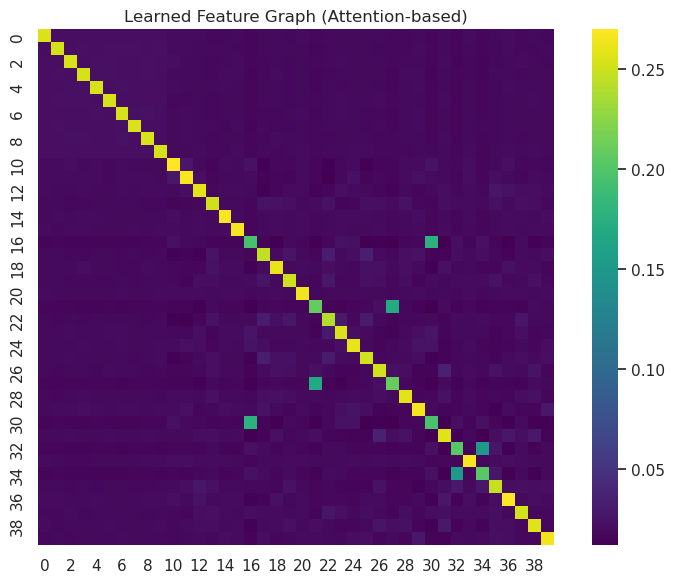

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(
    A_feat,
    cmap="viridis",
    square=True,
    cbar=True
)
plt.title("Learned Feature Graph (Attention-based)")
plt.tight_layout()
plt.show()


In [43]:
import numpy as np

def make_symmetric_no_diag(A):
    """
    A: (F, F) feature adjacency matrix (numpy array)
    return: 대칭 & diagonal=0인 adjacency
    """
    # 1) 양방향 정보 합치기 (여기선 평균, max로 바꿔도 됨)
    A_sym = (A + A.T) / 2.0

    # 2) 대각선 0으로
    np.fill_diagonal(A_sym, 0.0)

    return A_sym


def threshold_edges(A_sym, thr=0.2):
    """
    thr 이상인 edge만 남기고 나머지 0으로
    """
    A_thr = A_sym.copy()
    A_thr[A_thr < thr] = 0.0
    return A_thr


def topk_edges(A_sym, k=30):
    """
    대칭 adjacency에서 상위 k개 edge만 남기고 나머지는 0
    (무방향이니까 upper-tri만 보고 뽑음)
    """
    A_topk = np.zeros_like(A_sym)

    # upper triangle index (대각 제외)
    iu, ju = np.triu_indices_from(A_sym, k=1)
    weights = A_sym[iu, ju]

    # 상위 k개 index
    if k > len(weights):
        k = len(weights)
    topk_idx = np.argsort(weights)[-k:]

    sel_i = iu[topk_idx]
    sel_j = ju[topk_idx]

    # 양방향 edge 채우기
    A_topk[sel_i, sel_j] = weights[topk_idx]
    A_topk[sel_j, sel_i] = weights[topk_idx]

    return A_topk

import networkx as nx

def adjacency_to_graph(A, feature_names, drop_isolated=False):
    """
    A: (F, F) adjacency (대칭 & diagonal=0 가정)
    feature_names: 길이 F 리스트
    """
    G = nx.Graph()

    # 노드 추가
    for i, name in enumerate(feature_names):
        G.add_node(i, label=name)

    # edge 추가 (weight > 0 인 것만)
    F = A.shape[0]
    for i in range(F):
        for j in range(i+1, F):
            w = A[i, j]
            if w > 0:
                G.add_edge(i, j, weight=float(w))

    if drop_isolated:
        # 연결 안 된 노드 제거
        iso_nodes = list(nx.isolates(G))
        G.remove_nodes_from(iso_nodes)

    return G


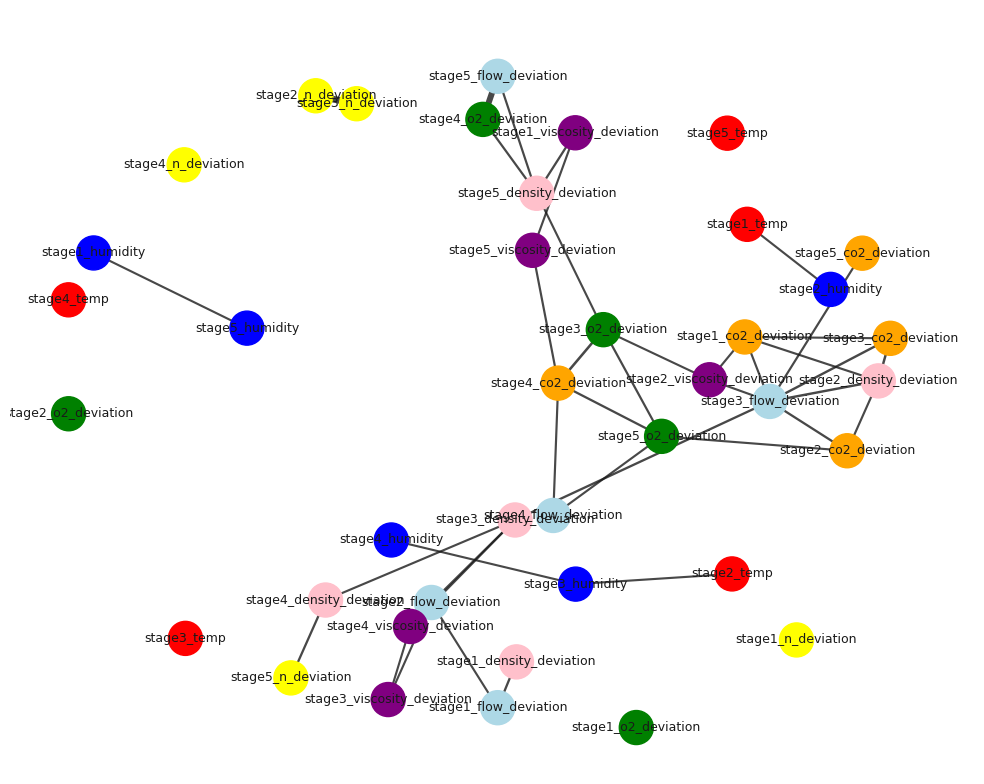

In [64]:
A_sym = make_symmetric_no_diag(A_feat)

# threshold 버전
A_thr = threshold_edges(A_sym, thr=0.0)

# top-k 버전
A_topk = topk_edges(A_sym, k=40)

feature_names = list(X_train_scaled.columns)  # 혹은 current_features 리스트

G = adjacency_to_graph(A_topk, feature_names)
# 또는 A_thr

import matplotlib.pyplot as plt
import networkx as nx

def draw_feature_graph(G, feature_names, figsize=(8, 6)):
    # layout 계산
    pos = nx.spring_layout(G, seed=42)

    # node label 매핑
    labels = {node: feature_names[node] for node in G.nodes()}

    # 🔴 node color 설정: 이름에 humidity / temperature / temp 들어가면 빨간색
    node_colors = []
    for node in G.nodes():
        name = feature_names[node].lower()
        if ("temp" in name):
            node_colors.append("red")        # humidity / temp 계열
        elif ("humid" in name):
            node_colors.append("blue")        # humidity / temp 계열
        elif ("_n_" in name):
            node_colors.append("yellow")
        elif ("_o2_" in name):
            node_colors.append("green")
        elif ("co2_" in name):
            node_colors.append("orange")
        elif ("flow_" in name):
            node_colors.append("lightblue")
        elif ("viscosity_" in name):
            node_colors.append("purple")
        elif ("density_" in name):
            node_colors.append("pink")
        else:
            node_colors.append("gray")  # 나머지

    # edge weight → 두께
    if len(G.edges()) > 0:
        weights = [G[u][v]['weight'] for u, v in G.edges()]
        max_w = max(weights)
        widths = [1.0 + 4.0 * (w / max_w) for w in weights]
    else:
        widths = []

    plt.figure(figsize=figsize)

    nx.draw_networkx_nodes(G, pos, node_size=600, node_color=node_colors)
    nx.draw_networkx_edges(G, pos, width=widths, alpha=0.8)
    nx.draw_networkx_labels(G, pos, labels, font_size=9)

    plt.axis("off")
    plt.tight_layout()
    plt.show()



G = adjacency_to_graph(A_topk, feature_names)
draw_feature_graph(G, feature_names, figsize=(10, 8))



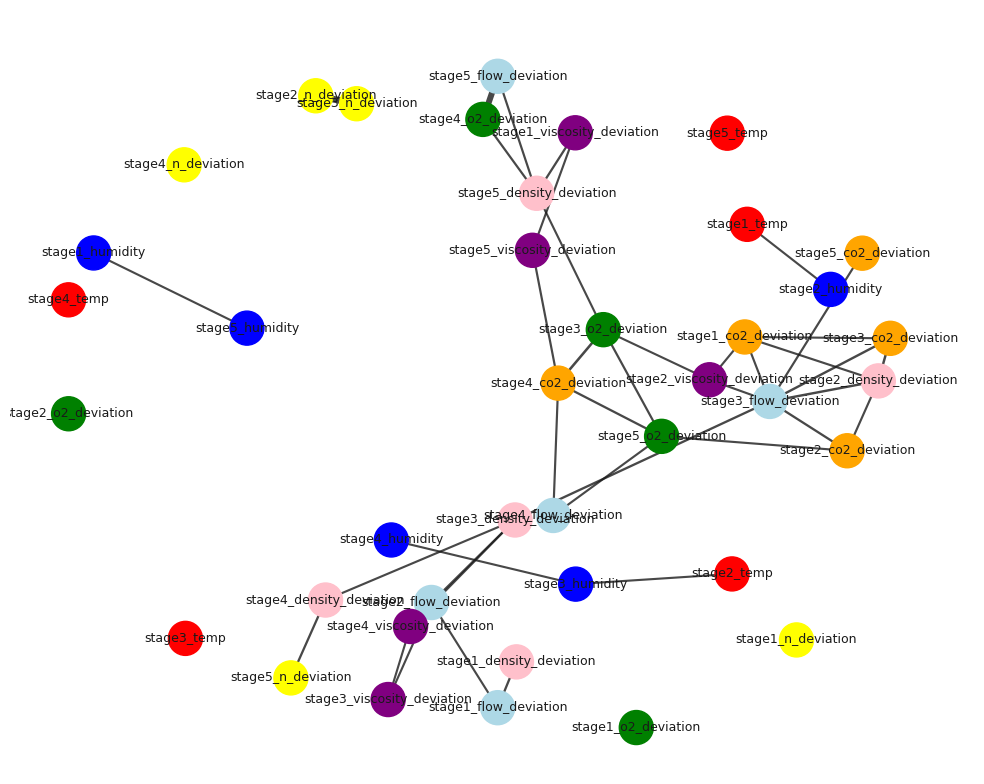

In [65]:
# 1) 학습 끝난 후, feature graph 평균 구함
A_feat = compute_feature_graph(fg_model, X_test_scaled.values)

# 2) 대칭 + diag=0
A_sym = make_symmetric_no_diag(A_feat)

# 3) 상위 edge만 남기기 (혹은 threshold_edges)
A_topk = topk_edges(A_sym, k=40)

# 4) 그래프로 만들고 시각화
feature_names = list(X_test_scaled.columns)
G = adjacency_to_graph(A_topk, feature_names)
draw_feature_graph(G, feature_names, figsize=(10, 8))


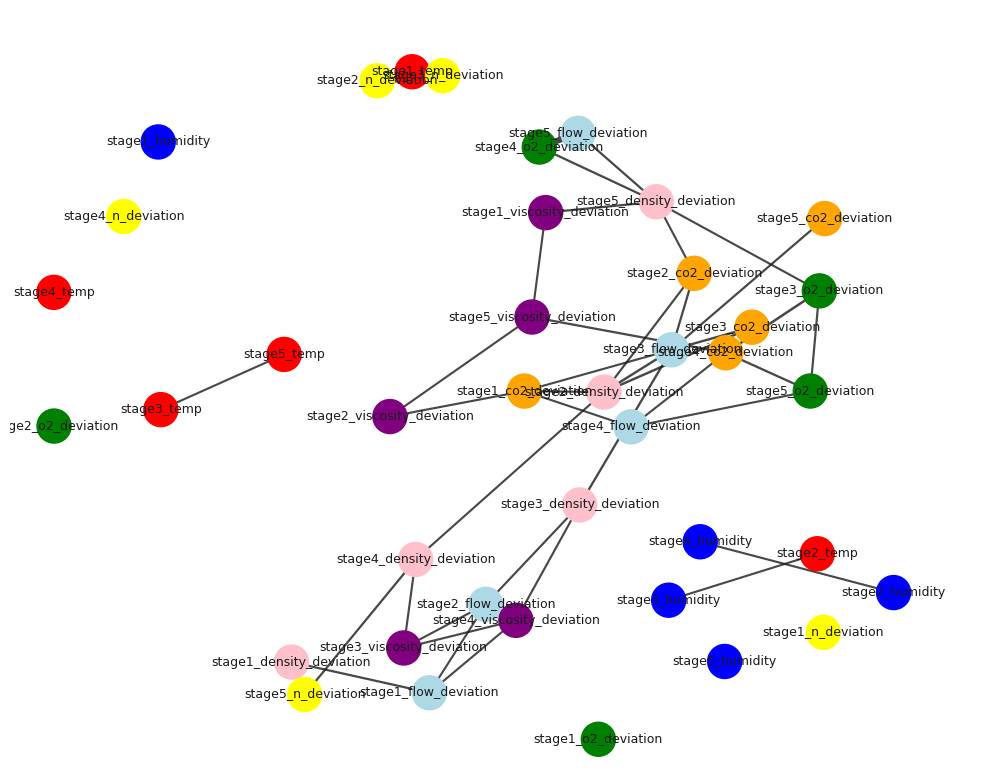

In [66]:
# 1) 학습 끝난 후, feature graph 평균 구함
A_feat = compute_feature_graph(fg_model, X_train_scaled.values)

# 2) 대칭 + diag=0
A_sym = make_symmetric_no_diag(A_feat)

# 3) 상위 edge만 남기기 (혹은 threshold_edges)
A_topk = topk_edges(A_sym, k=40)

# 4) 그래프로 만들고 시각화
feature_names = list(X_train_scaled.columns)
G = adjacency_to_graph(A_topk, feature_names)
draw_feature_graph(G, feature_names, figsize=(10, 8))


In [46]:
from sklearn.feature_selection import mutual_info_regression

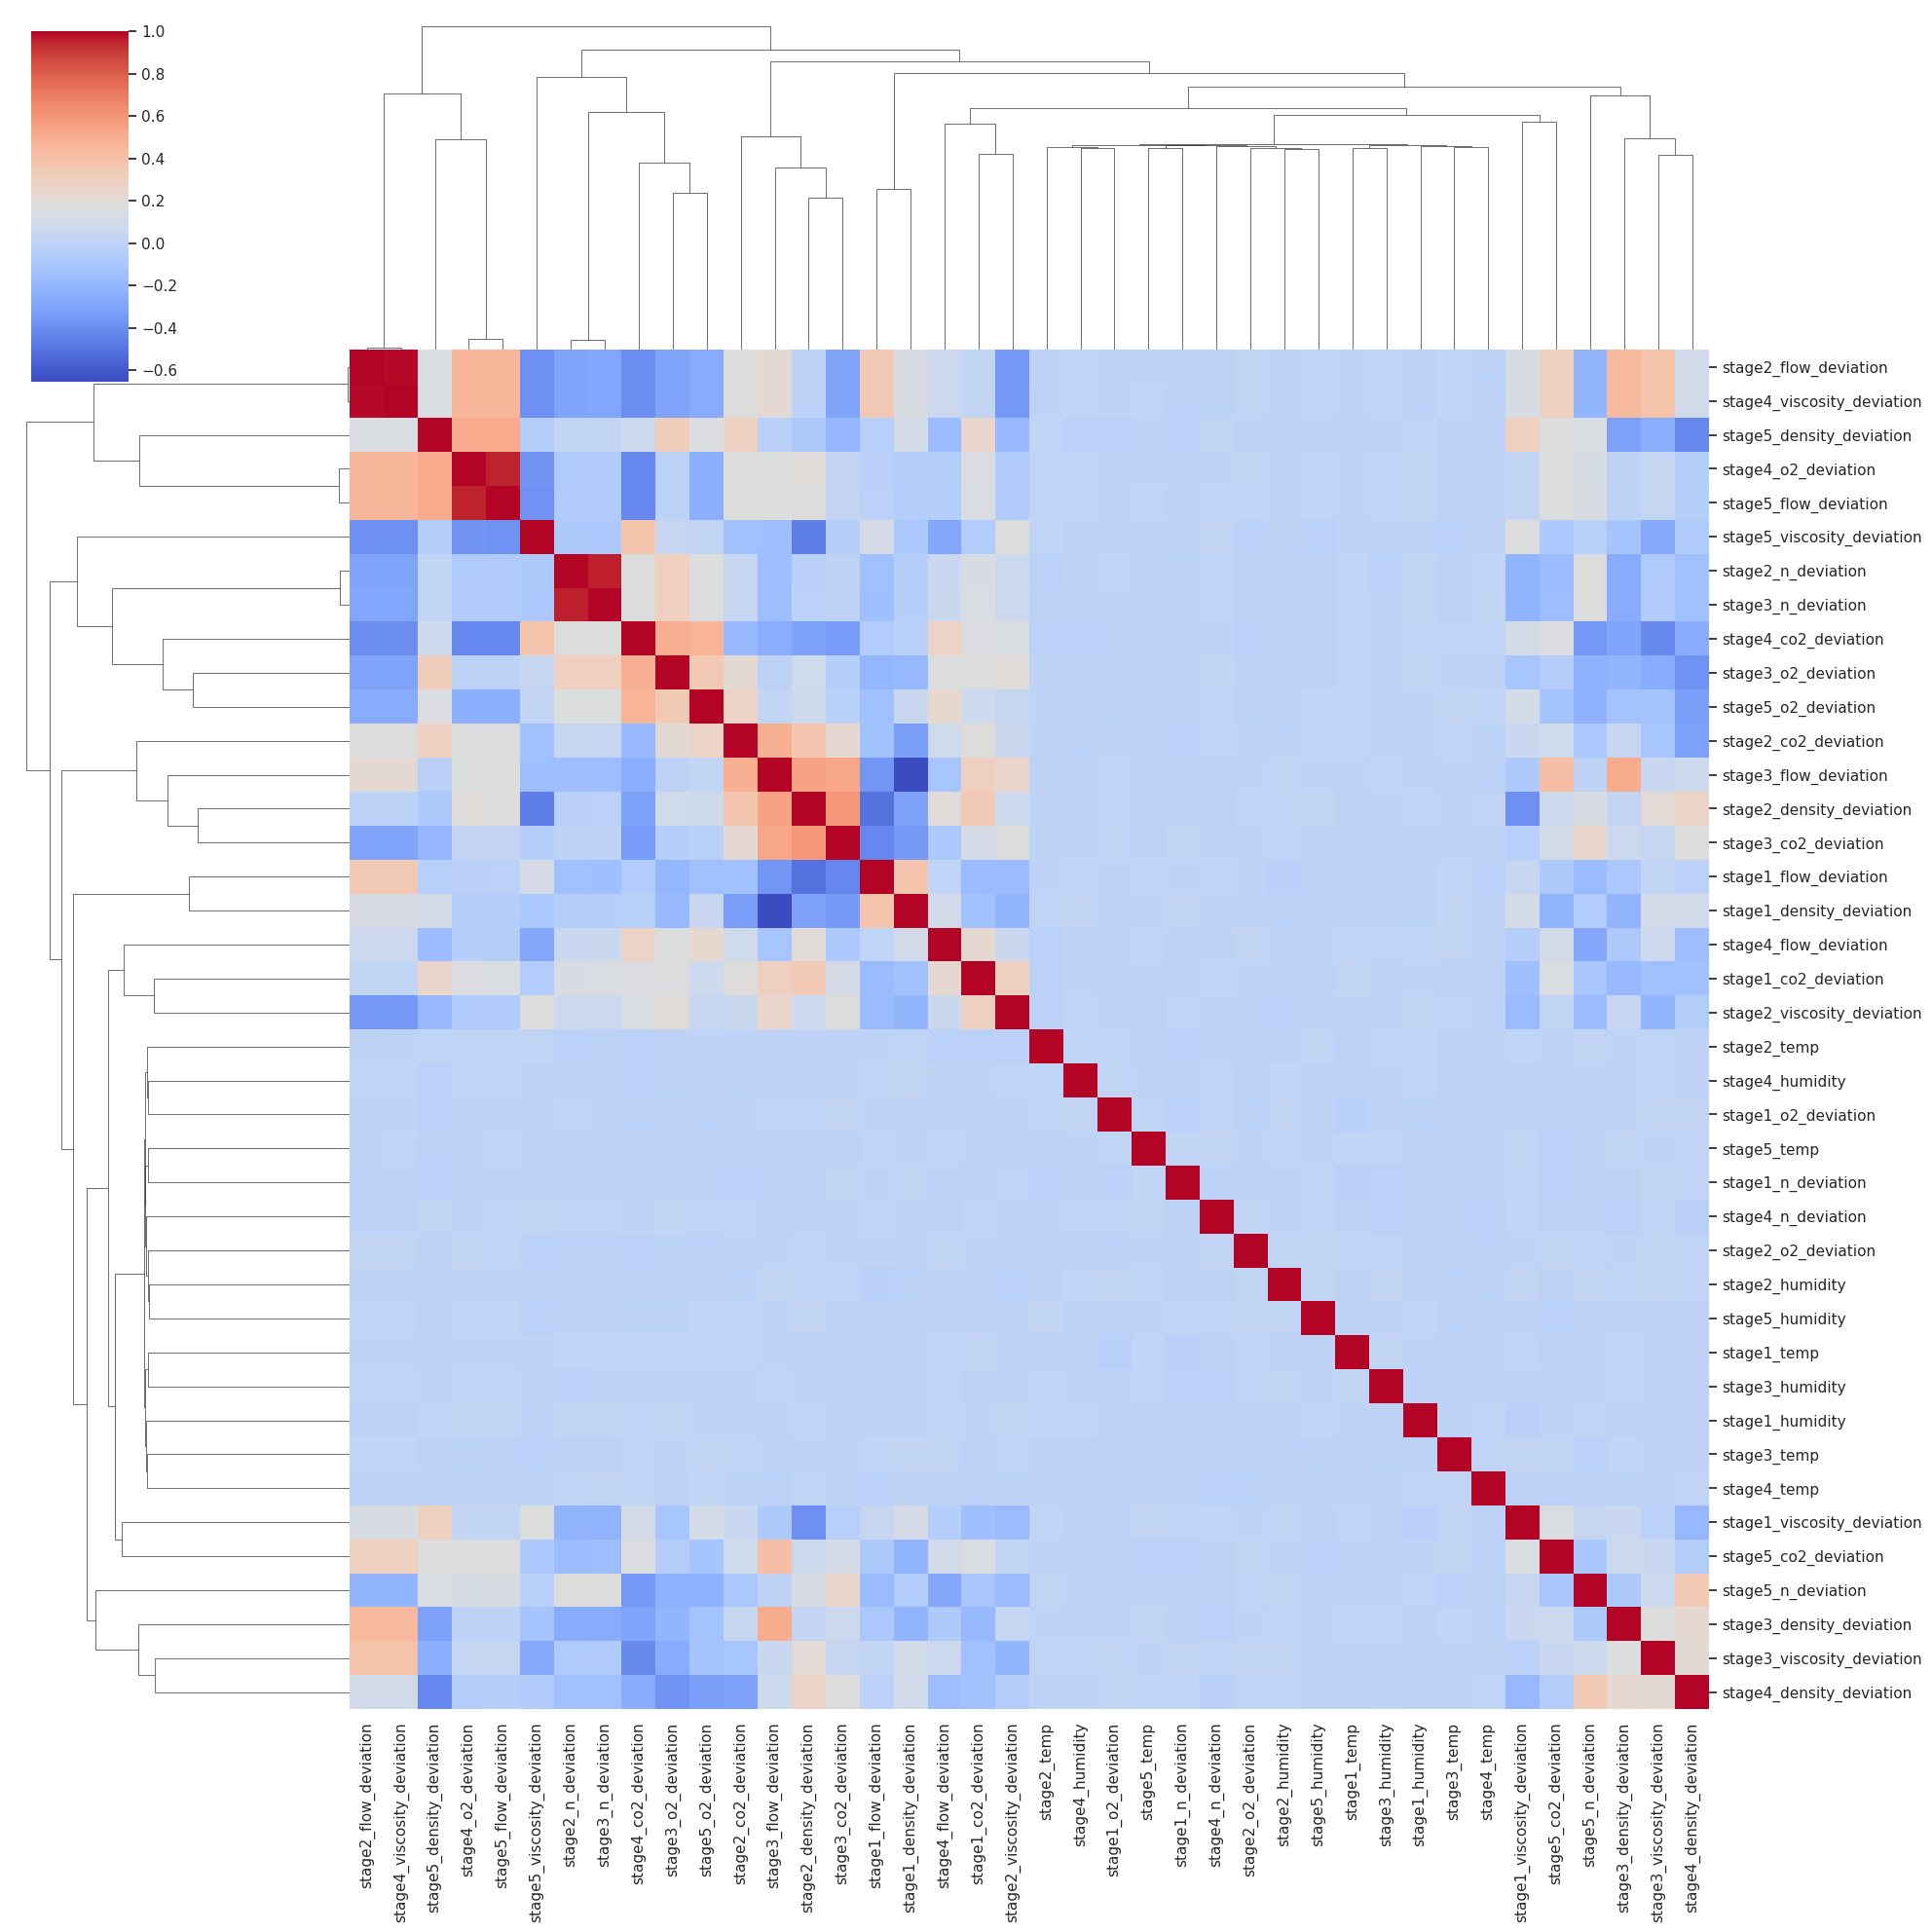

In [55]:
sns.clustermap(X_train_scaled.corr(), cmap="coolwarm",
    figsize=(20, 20) )

In [53]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from tqdm import tqdm

def mutual_info_matrix(df):
    cols = df.columns
    n = len(cols)
    MI = np.zeros((n, n))

    # 각 컬럼을 y 로 두고 나머지 X 로 MI 계산
    for i, target in enumerate(tqdm(cols)):
        y = df[target].values
        X = df.drop(columns=[target]).values

        mi_vals = mutual_info_regression(X, y, random_state=42)

        # 결과를 matrix에 넣기
        MI[i, :i] = mi_vals[:i]
        MI[i, i+1:] = mi_vals[i:]
        # 자기 자신은 0
        MI[i, i] = 0

    # 대칭화 (average)
    MI = (MI + MI.T) / 2

    return pd.DataFrame(MI, index=cols, columns=cols)


In [56]:
MI_df = mutual_info_matrix(X_train_scaled)


100%|██████████| 40/40 [01:08<00:00,  1.71s/it]


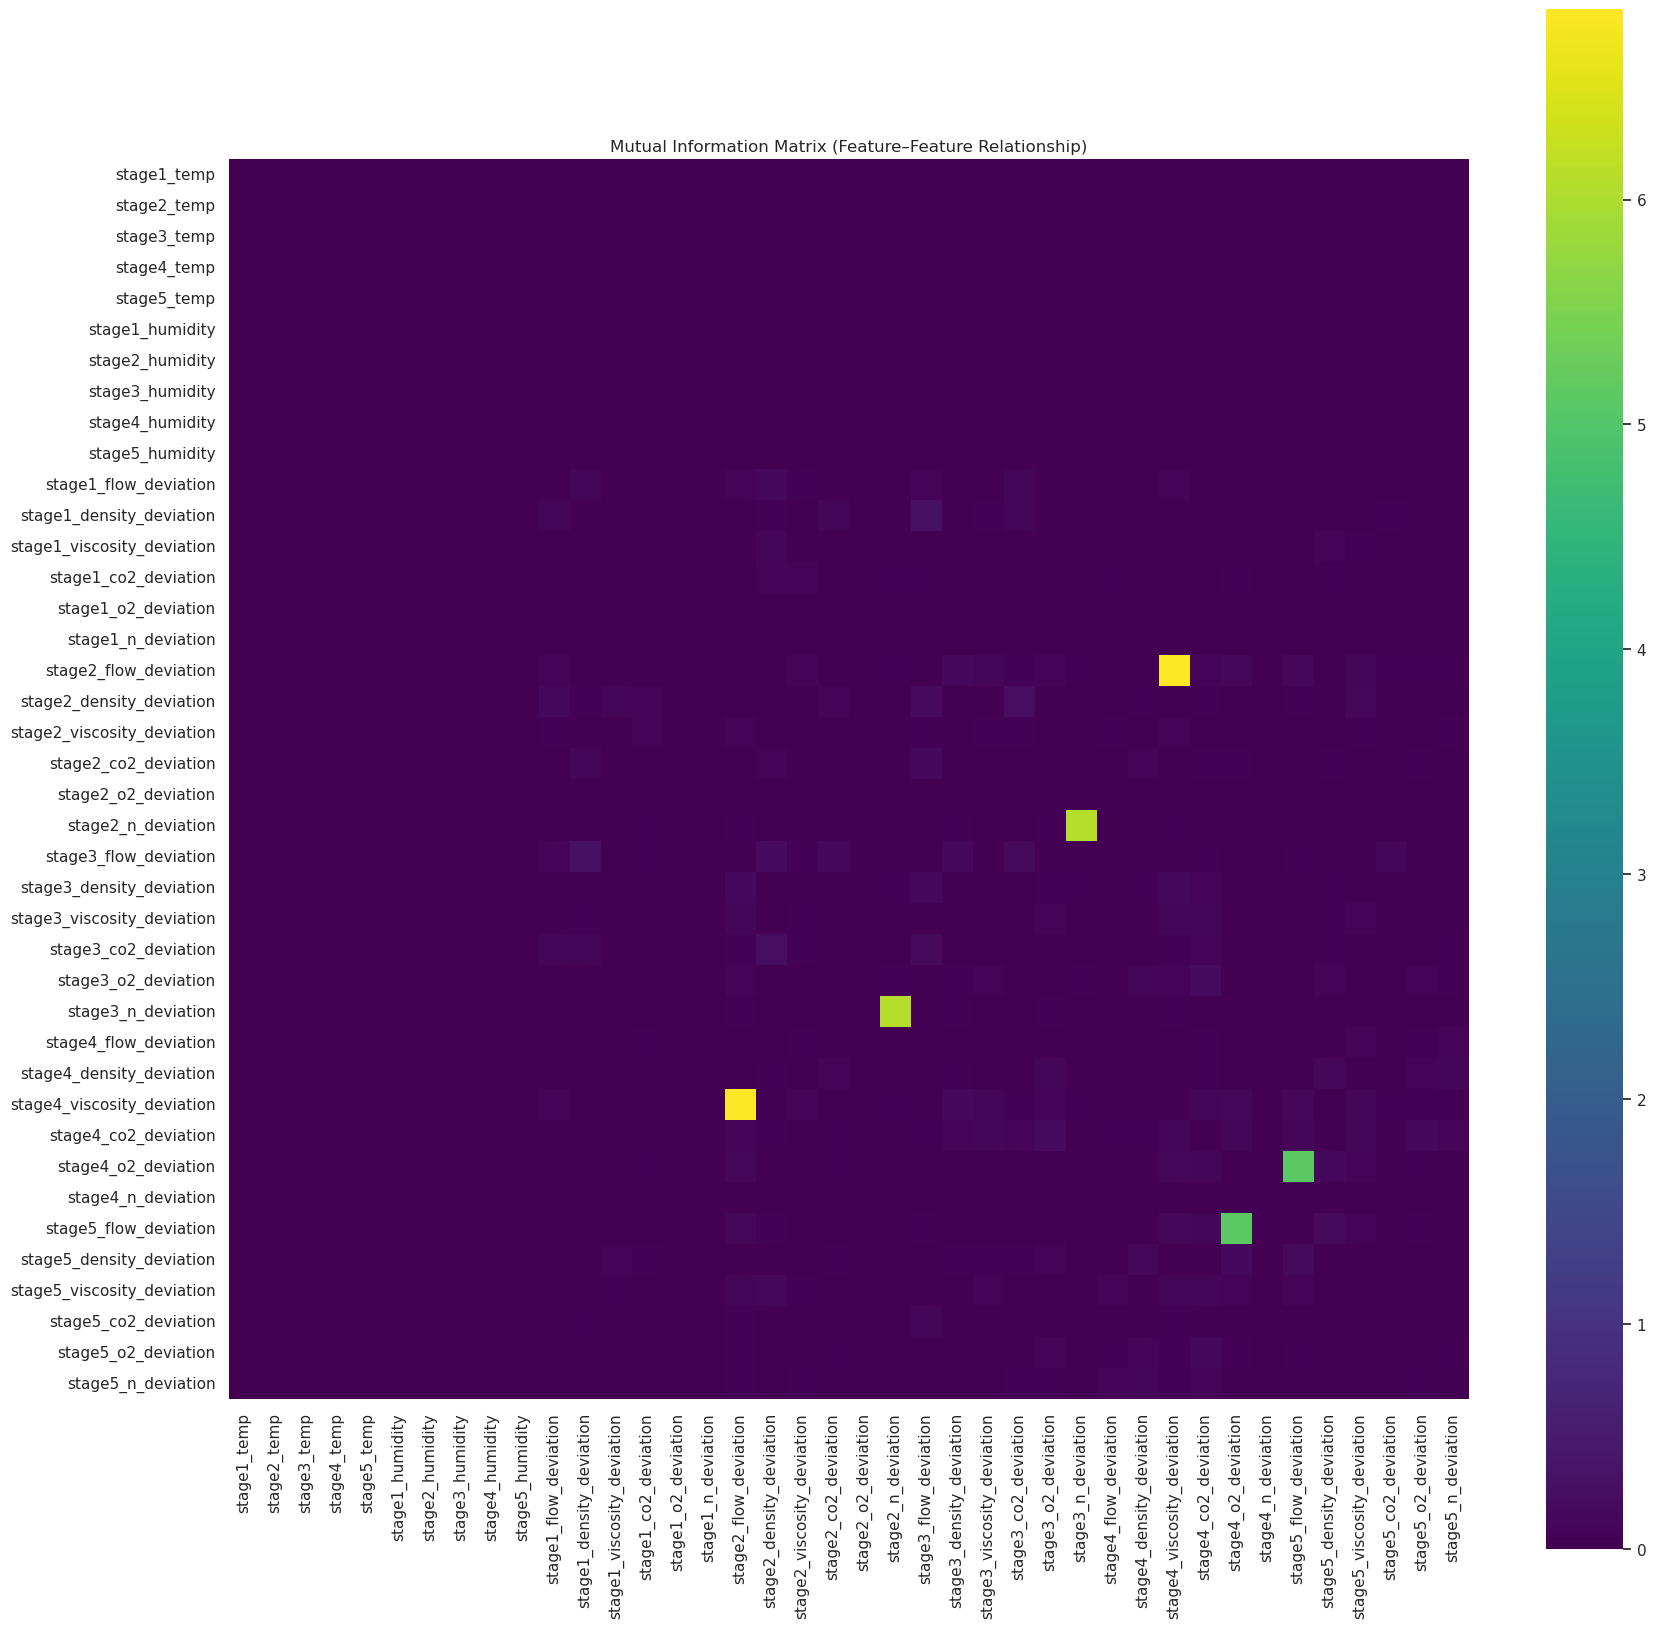

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(MI_df, cmap="viridis", square=True)
plt.title("Mutual Information Matrix (Feature–Feature Relationship)")
plt.show()


In [67]:
import re

def parse_stage_var(col):
    m = re.match(r"stage(\d+)_(.+)", col)
    if m:
        return int(m.group(1)), m.group(2)
    return None, None

from collections import defaultdict

def build_layout(feature_names):
    var_types = set()
    for name in feature_names:
        _, v = parse_stage_var(name)
        if v is not None:
            var_types.add(v)

    var_list = sorted(var_types)
    var_to_y = {v: i for i, v in enumerate(var_list)}
    return var_to_y, var_list

def compute_positions(feature_names):
    var_to_y, var_list = build_layout(feature_names)
    pos = {}

    for idx, name in enumerate(feature_names):
        s, v = parse_stage_var(name)
        if s is None:
            pos[idx] = (0, 0)
        else:
            y = -var_to_y[v]
            pos[idx] = (s, y)

    return pos

import matplotlib.pyplot as plt
import networkx as nx

def draw_feature_graph_flow(G, feature_names, figsize=(10, 8)):
    # stage-flow 기반 좌표
    pos = compute_positions(feature_names)

    # label
    labels = {node: feature_names[node] for node in G.nodes()}

    # === 🎨 색상 규칙 (네가 준 것 그대로) ===
    node_colors = []
    for node in G.nodes():
        name = feature_names[node].lower()

        if "temp" in name:
            node_colors.append("red")
        elif "humid" in name:
            node_colors.append("blue")
        elif "_n_" in name:
            node_colors.append("yellow")
        elif "_o2_" in name:
            node_colors.append("green")
        elif "co2_" in name:
            node_colors.append("orange")
        elif "flow_" in name:
            node_colors.append("lightblue")
        elif "viscosity_" in name:
            node_colors.append("purple")
        elif "density_" in name:
            node_colors.append("pink")
        else:
            node_colors.append("gray")

    # edge 두께
    if len(G.edges()) > 0:
        weights = [G[u][v]['weight'] for u, v in G.edges()]
        max_w = max(weights)
        widths = [1.0 + 4.0 * (w / max_w) for w in weights]
    else:
        widths = []

    # plot
    plt.figure(figsize=figsize)

    nx.draw_networkx_nodes(G, pos, node_size=600, node_color=node_colors)
    nx.draw_networkx_edges(G, pos, width=widths, alpha=0.8)
    nx.draw_networkx_labels(G, pos, labels, font_size=9)

    # axis off
    plt.axis("off")
    plt.tight_layout()
    plt.show()


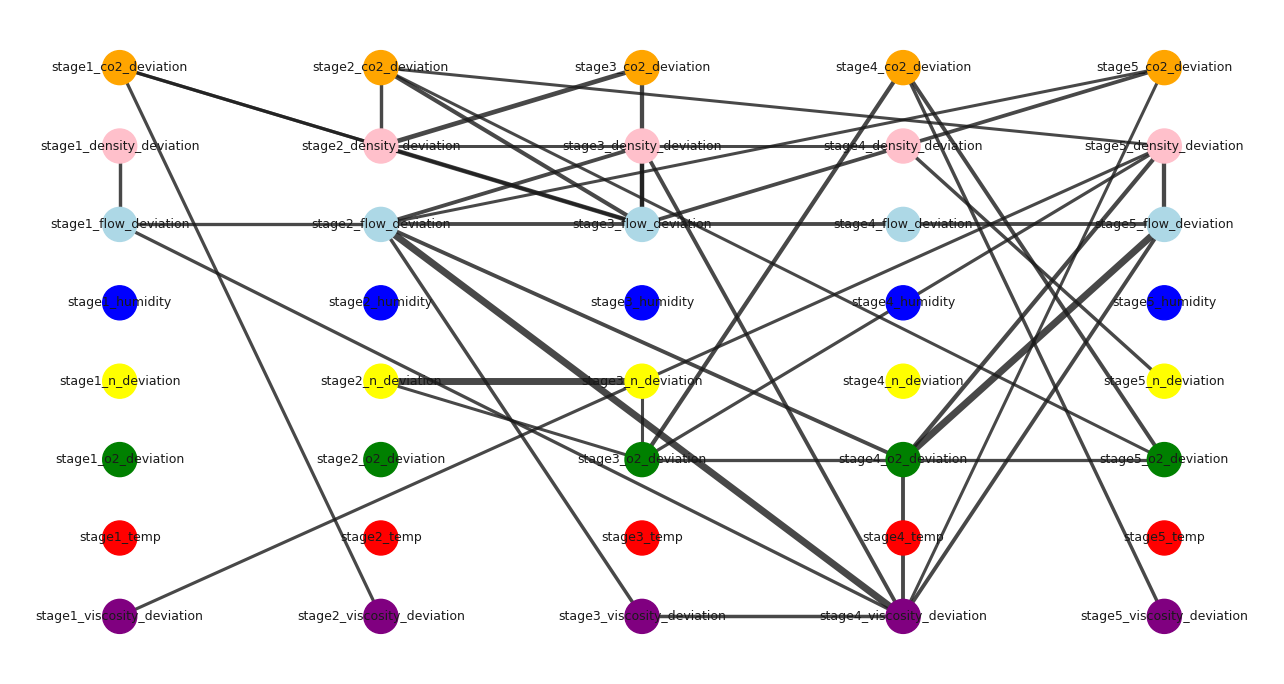

In [92]:
# 2) 대칭 + diag=0
A_sym1 = make_symmetric_no_diag(np.array(full_corr))

# 3) 상위 edge만 남기기 (혹은 threshold_edges)
A_topk1 = topk_edges(A_sym1, k=40)

G = adjacency_to_graph(A_topk1, full_corr.columns.to_list())
draw_feature_graph_flow(G, full_corr.columns.to_list(), figsize=(13, 7))


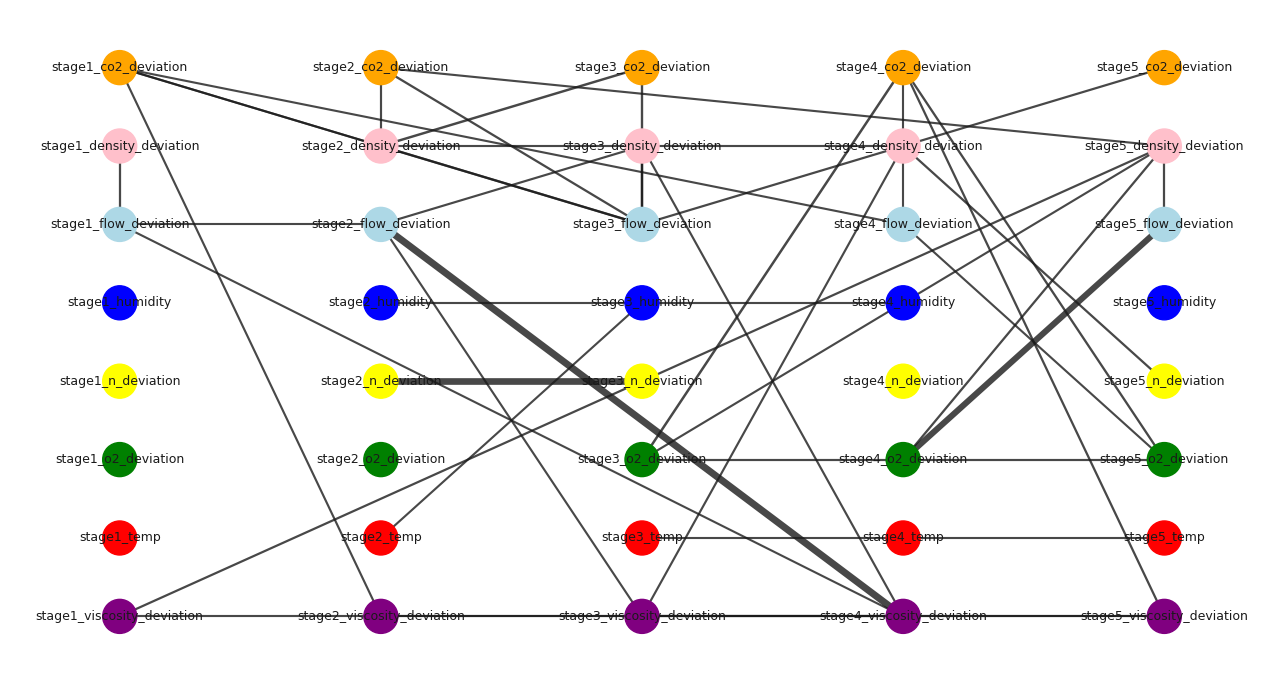

In [91]:
G = adjacency_to_graph(A_topk, feature_names)
draw_feature_graph_flow(G, feature_names, figsize=(13, 7))

